In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

Load Dataset

In [ ]:
x_train = pd.read_csv('input.csv', delimiter = ',')
y_train = pd.read_csv('labels.csv', delimiter = ',')

x_test = pd.read_csv('input_test.csv', delimiter = ',')
y_test = pd.read_csv('labels_test.csv', delimiter = ',')

In [ ]:
x_train = np.array(x_train).reshape(len(x_train), 100, 100, 3)
y_train = np.array(y_train).reshape(len(y_train), 1)

x_test = np.array(x_test).reshape(len(x_test), 100, 100, 3)
y_test = np.array(y_test).reshape(len(y_test), 1)

x_train = x_train/255
x_test = x_test/255

In [ ]:
print("Shape of x_train: ", x_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of x_train:  (1161, 100, 100, 3)
Shape of y_train:  (1999, 1)
Shape of x_test:  (399, 100, 100, 3)
Shape of y_test:  (399, 1)


In [ ]:
x_train[1,:]

array([[[0.31372549, 0.36078431, 0.34509804],
        [0.3254902 , 0.37647059, 0.34901961],
        [0.29803922, 0.36078431, 0.32156863],
        ...,
        [0.05490196, 0.1372549 , 0.07843137],
        [0.05490196, 0.1372549 , 0.07843137],
        [0.07843137, 0.16078431, 0.10196078]],

       [[0.30588235, 0.34117647, 0.32941176],
        [0.35294118, 0.39607843, 0.37254902],
        [0.30980392, 0.35294118, 0.32156863],
        ...,
        [0.14509804, 0.21176471, 0.14901961],
        [0.12156863, 0.18823529, 0.1254902 ],
        [0.05098039, 0.11764706, 0.05490196]],

       [[0.25098039, 0.25882353, 0.24705882],
        [0.31372549, 0.33333333, 0.30980392],
        [0.36470588, 0.39215686, 0.36078431],
        ...,
        [0.15686275, 0.18039216, 0.1254902 ],
        [0.15686275, 0.18823529, 0.12941176],
        [0.05490196, 0.08627451, 0.02745098]],

       ...,

       [[0.39215686, 0.42745098, 0.36078431],
        [0.36470588, 0.41568627, 0.3372549 ],
        [0.35294118, 0

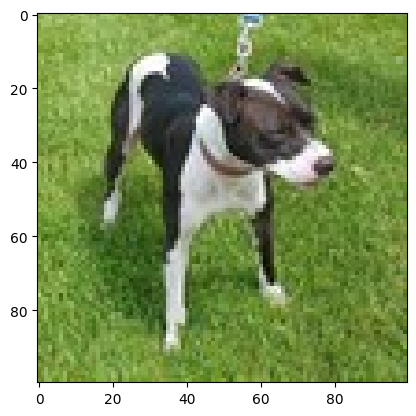

In [ ]:
idx = random.randint(0, len(x_train))
plt.imshow(x_train[idx, :])
plt.show()

Model

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation = 'relu', input_shape = (100, 100, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(32, (3, 3), activation = 'relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


OR

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))


In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

x_train shape: (1161, 100, 100, 3)
y_train shape: (1999, 1)


In [ ]:
x_train = x_train[:1999]
y_train = y_train[:1161]

In [ ]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

x_train shape: (1161, 100, 100, 3)
y_train shape: (1161, 1)


In [ ]:
model.fit(x_train, y_train, epochs = 10, batch_size = 64)

Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.8603 - loss: nan
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 32s 796ms/step - accuracy: 0.8588 - loss: nan
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 13s 656ms/step - accuracy: 0.8705 - loss: nan
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 19s 596ms/step - accuracy: 0.8669 - loss: nan
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 22s 687ms/step - accuracy: 0.8745 - loss: nan
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 21s 737ms/step - accuracy: 0.8611 - loss: nan
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 20s 727ms/step - accuracy: 0.8466 - loss: nan
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 21s 735ms/step - accuracy: 0.8529 - loss: nan
Epoch 9/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 20s 691ms/step - accuracy: 0.8572 - loss: nan
Epoch 10/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 14s 729ms/step - accuracy: 0.8618 - loss: nan


In [ ]:
model.evaluate(x_test, y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 186ms/step - accuracy: 0.7900 - loss: nan


[nan, 0.4987468719482422]

Making Predictions

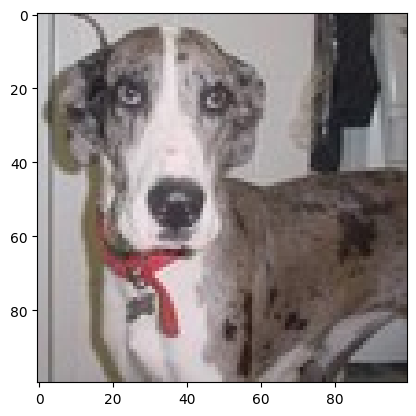

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Our model says it is a:  dog


In [ ]:
idx2 = random.randint(0, len(y_test))
plt.imshow(x_test[idx2, :])
plt.show()

y_pred = model.predict(x_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = (y_pred > 0.5)

if(y_pred==0):
  pred = 'dog'
else:
  pred = 'cat'

print("Our model says it is a: ", pred)